### Import Python Libraries

In [1]:
# pip install nltk

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
from sklearn.metrics import classification_report

In [4]:
from sklearn.metrics import confusion_matrix

# DATA ACQUISITION

In [5]:
Text_data = pd.read_csv('train_data.txt', sep= ":::", names = ["TITLE", "GENRE", "DESCRIPTION"], engine = "python")

In [6]:
Text_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


## DATA SET INFO

In [7]:
Text_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [8]:
Text_data.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


## Checking for missing values in the Data

In [9]:
Text_data.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

# Test_Dataset

In [10]:
Test_data = pd.read_csv('test_data.txt' , sep = ":::", names = ["ID" , "TITLE", "DESCRIPTION"], engine = "python")

In [11]:
Test_data

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [12]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


# EDA

C:\Users\gjgau\AppData\Local\Temp\ipykernel_16676\1447524103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = Text_data, x = "GENRE" , order = Text_data["GENRE"].value_counts().index, palette = "YlGnBu")


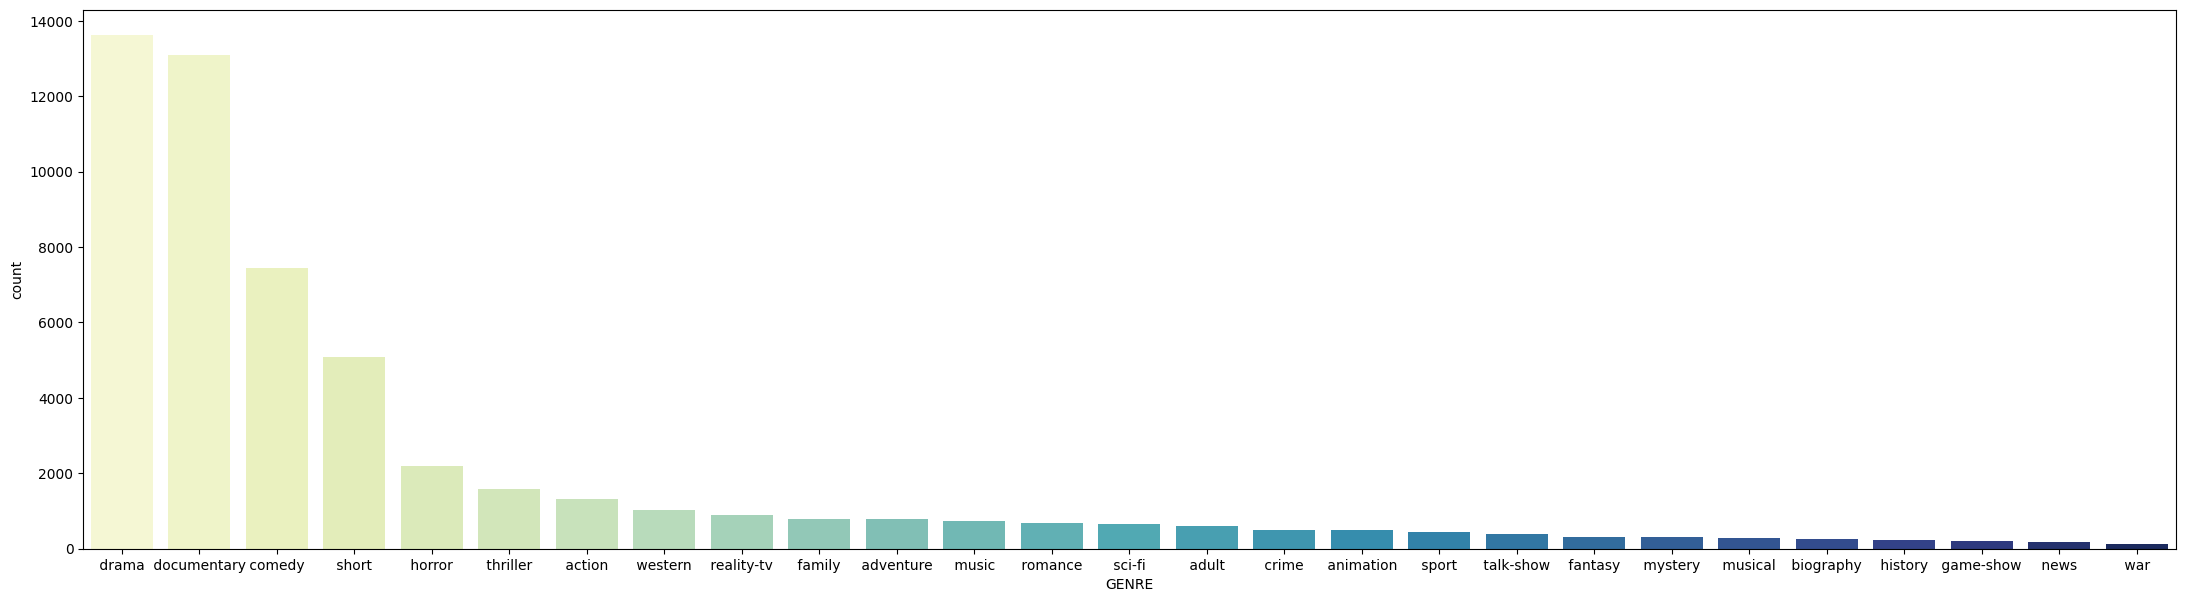

In [13]:
plt.figure(figsize = (27,7))
sns.countplot(data = Text_data, x = "GENRE" , order = Text_data["GENRE"].value_counts().index, palette = "YlGnBu")
plt.show()

# Data Preprocessing

In [14]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gjgau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

In [16]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Data Cleaning

In [17]:
def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+',  '' ,text)# removal of special character like '@'
    text = re.sub(r'.pic\S+' , '' , text) # removal of media file link like .png , .pic etc
    text = re.sub(r'http\S+' , '' , text) # removal of URL
    text = re.sub(r'[^a-zA-Z+]' , ' ', text) # replacing non alphabatic character with space
    text = "".join([i for i in text if i not in string.punctuation]) # remove the punctuation from the string 
    words = nltk.word_tokenize(text) # separate the string into different tokens
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2]) # remove the stop words and all the remaining words with space
    text = re.sub(r"\s+", " ",text).strip() # replace multiple spaces with a single space
    # text = " ".join(stemmer.stem(word) for word in words)
    return text
    
    

In [18]:
Text_data["TextCleaning"] = Text_data["DESCRIPTION"].apply(cleaning_data)
Test_data["TextCleaning"] = Test_data["DESCRIPTION"].apply(cleaning_data)

# 

## Dataset after cleaning

# 

In [19]:
Text_data

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [20]:
Test_data

,ID,TITLE,DESCRIPTION,TextCleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years serious cance...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock mike mallard askew bro...


# 

### Now converting this string data into numeric data by using
### TF-IDF matrix

###

In [21]:
vectorize = TfidfVectorizer()
X_train = vectorize.fit_transform(Text_data["TextCleaning"])
X_test = vectorize.transform(Test_data["TextCleaning"])

In [22]:
X_train

<54214x116601 sparse matrix of type '<class 'numpy.float64'>'
	with 2607208 stored elements in Compressed Sparse Row format>

In [23]:
X = X_train
Y = Text_data["GENRE"]

In [24]:
Y

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
54210          comedy 
54211          horror 
54212     documentary 
54213          comedy 
54214         history 
Name: GENRE, Length: 54214, dtype: object

In [39]:
X_train, X_test ,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Train the Model

In [49]:
model = SVC()
model.fit(X_train ,Y_train)

SVC()

In [1]:
model.score(X_train, Y_train)

NameError: name 'model' is not defined

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
accuracy = accuracy_score(Y_test,  y_pred)
print("Validation Accuracy:", accuracy)


In [ ]:
print(classification_report(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred)

<!-- ## Hyperparameter tunning using GridSearchCv to improve accuracy -->


In [ ]:
# import grid

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {'C' : [0.1, 1 ,10, 100], 'gamma' : [1,0.1,0.01,0.001], 'kernel' : ['rbf'] }

In [ ]:
# grid = GridSearchCV(SVC(), param_grid , verbose = 2, cv = 5)
# grid.fit(X_train, Y_train)

In [ ]:
# gid_prediction = grid.predict(X_test)
# print(confusion_matrix(y_test , grid_predictions)

In [ ]:
# print(classification_report(y_test, grid_predictions))

## NOW USING NAIVE BAYES ALGORITHM 

In [42]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB, BernoulliNB

In [31]:
mnb = MultinomialNB(alpha = 0.8, fit_prior = True, force_alpha = True)
mnb.fit(X_train, Y_train)

MultinomialNB(alpha=0.8)

In [33]:
y_pred_mnb = mnb.predict(X_test)
print(classification_report(Y_test, y_pred_mnb))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.62      0.05      0.10      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

C:\Users\gjgau\pythonanaconda\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gjgau\pythonanaconda\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gjgau\pythonanaconda\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [43]:
gnb = BernoulliNB()

In [44]:
gnb.fit(X_train ,Y_train)

BernoulliNB()

In [46]:
pred = gnb.predict(X_test)

In [48]:
print(classification_report(pred, Y_test))

               precision    recall  f1-score   support

      action        0.00      0.25      0.01         4
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         2
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.35      0.53      0.42       944
       crime        0.00      0.00      0.00         0
 documentary        0.89      0.58      0.70      4124
       drama        0.87      0.42      0.56      5619
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.06      0.77      0.12        35
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

C:\Users\gjgau\pythonanaconda\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gjgau\pythonanaconda\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gjgau\pythonanaconda\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
